Day 1: Height = 57 pixels
Day 2: Height = 57 pixels
Day 3: Height = 45 pixels
Day 4: Height = 71 pixels
Day 5: Height = 74 pixels
Day 6: Height = 69 pixels
Day 7: Height = 69 pixels
Day 8: Height = 63 pixels
Day 9: Height = 67 pixels
Day 10: Height = 65 pixels
Day 11: Height = 52 pixels
Day 12: Height = 65 pixels
Day 13: Height = 66 pixels
Day 14: Height = 51 pixels


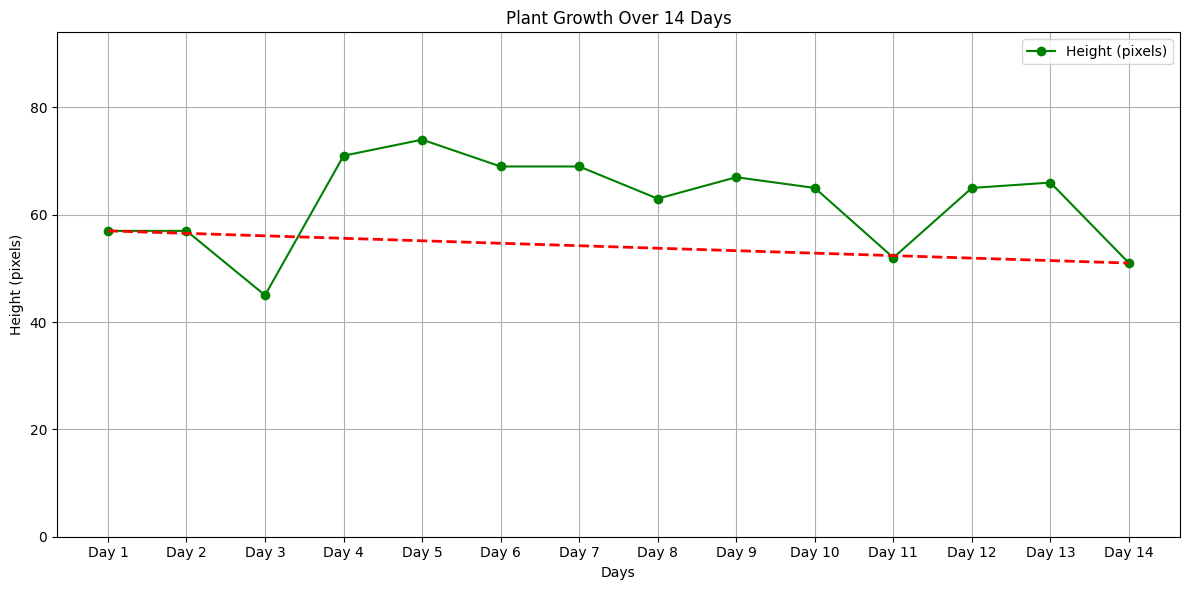

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def enhance_image(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, np.array([40, 40, 40]), np.array([100, 255, 255]))
    mask = cv2.GaussianBlur(mask, (5, 5), 0)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

def measure_plant_height(base_path, output_folder, day):
    # Create image path like "C:/Users/DELL/Desktop/IP Project/DAY-1 (1).jpg"
    image_filename = f"DAY-{day} (1).jpg"
    image_path = os.path.join(base_path, image_filename)

    img = cv2.imread(image_path)
    if img is None:
        print(f"Day {day}: Image not found - {image_path}")
        return 0

    img = cv2.resize(img, (600, 400))
    mask = enhance_image(img)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f'Height: {h}px', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        os.makedirs(output_folder, exist_ok=True)
        output_image_path = os.path.join(output_folder, image_filename)
        cv2.imwrite(output_image_path, img)

        # Display the image (optional)
        cv2.imshow(f'Day {day} - Plant Height', img)
        cv2.waitKey(500)  # Show image for 0.5 seconds
        cv2.destroyAllWindows()

        print(f"Day {day}: Height = {h} pixels")
        return h

    print(f"Day {day}: No plant detected.")
    return 0

def plot_growth(base_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    heights_px = []
    days = []

    for day in range(1, 15):
        height = measure_plant_height(base_path, output_folder, day)
        heights_px.append(height)
        days.append(f"Day {day}")

    # Plotting growth chart
    plt.figure(figsize=(12, 6))
    plt.plot(days, heights_px, marker='o', linestyle='-', color='green', label='Height (pixels)')
    plt.title('Plant Growth Over 14 Days')
    plt.xlabel('Days')
    plt.ylabel('Height (pixels)')
    plt.ylim(0, max(heights_px, default=750) + 20)
    plt.grid(True)
    plt.legend()

    # Draw line from start to end
    if len(heights_px) >= 2:
        plt.plot([days[0], days[-1]], [heights_px[0], heights_px[-1]], color='red', linestyle='--', linewidth=2)

    plt.tight_layout()
    plt.show()

# ✅ Run growth tracking
plot_growth(r"C:\Users\DELL\Desktop\IP Project", r"C:\Users\DELL\Desktop\IP Project\detectedContours")
